# Biodiversity
For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

### Data files
- species_info.csv - contains data about different species and their conservation status
- observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.


# Scoping
## Project Objectives:
- Complete a project to add to your portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow
  
### Goals
  -  What is the distribution of `conservation_status` for animals?
  -  Are certain types of species more likely to be endangered?
  -  Are the differences between species and their conservation status significant?
  -  Which species were spotted the most at each park?

### Data

### Analysis

### Evaluation


## Git (first, create repository on Github)
Go to folder with the files you want to save on git/github. Then
- git init
- git remote add origin git@github.com:username/repository-name.git
- git add .
- git commit -m "Initial commit"
- git push -u origin master
- git push

## Import python modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr




## Import data files

In [2]:
species = pd.read_csv("species_info.csv")
observation = pd.read_csv("observations.csv")



In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


species_info.csv -> DataFrame "species"
   - `category` - class of animal
   - `scientific_name` - the scientific name of each species
   - `common_name` - the common names of each species
   - `conservation_status` - each species’ current conservation status

In [4]:
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


observations.csv -> DataFrame "observation"
   - `scientific_name` - the scientific name of each species
   - `park_name` - Park where species were found
   - `observations` - the number of times each species was observed at park

## Explore the data

In [5]:
print(f"species shape: {species.shape}")
print(f"species columns: {species.columns}")
print(f"\nspecies description:\n{species.describe()}")
print(f"\nspecies count:\n{species.count()}")


species shape: (5824, 4)
species columns: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

species description:
              category       scientific_name        common_names  \
count             5824                  5824                5824   
unique               7                  5541                5504   
top     Vascular Plant  Hypochaeris radicata  Brachythecium Moss   
freq              4470                     3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  

species count:
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64


In [6]:
print(f"observation shape: {observation.shape}")
print(f"observation columns: {observation.columns}")
print(f"\nobservation description:\n{observation.describe()}")
print(f"\nobservation count:\n{observation.count()}")


observation shape: (23296, 3)
observation columns: Index(['scientific_name', 'park_name', 'observations'], dtype='object')

observation description:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

observation count:
scientific_name    23296
park_name          23296
observations       23296
dtype: int64


## Explore the data

Categories in the species file:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Amount of unique species: 5541

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


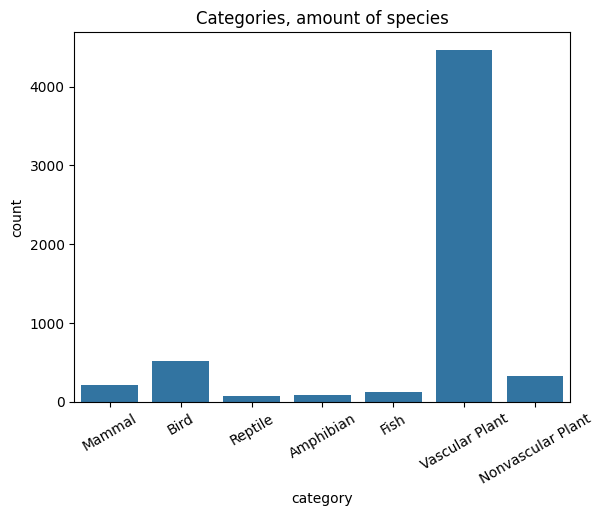

<Figure size 640x480 with 0 Axes>

In [7]:
print(f"Categories in the species file:\n{species["category"].unique()}")
print(f"\nAmount of unique species: {species.scientific_name.nunique()}")
print(f"\n{species.groupby("category").size()}")

sns.countplot(x="category", data = species)
plt.title("Categories, amount of species")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


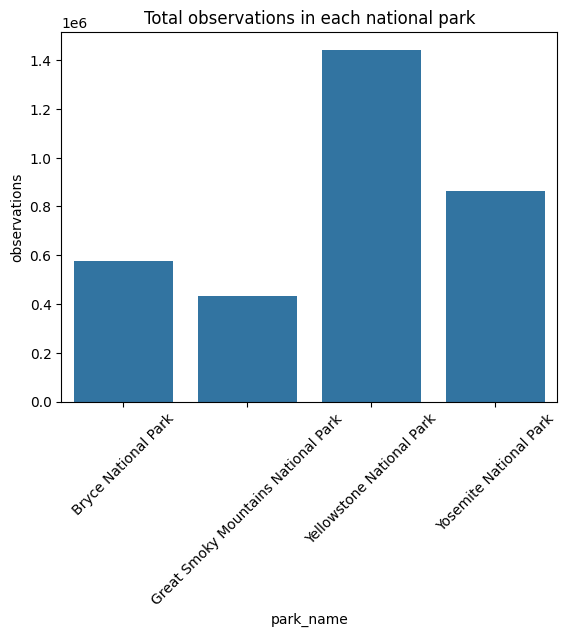

<Figure size 640x480 with 0 Axes>

In [8]:
nationalpark_count = observation.groupby('park_name')['observations'].sum()
print(nationalpark_count)
sns.barplot(nationalpark_count)
plt.title("Total observations in each national park")
plt.xticks(rotation = 45)
plt.show()
plt.clf()

## Analysis

In [18]:
all_data = pd.merge(species, observation)
all_data.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the conservation_status column in species.

The column `conservation_status` has several possible values:

   - `Species of Concern`: declining or appear to be in need of conservation
   - `Threatened`: vulnerable to endangerment in the near future
   - `Endangered`: seriously at risk of extinction
   - `In Recovery`: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `NaN` values were detected. These values will need to be converted to `No Intervention`.


In [19]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [10]:
print(observation.value_counts())

scientific_name                      park_name                            observations
Trifolium campestre                  Yellowstone National Park            239             2
Streptopelia decaocto                Yellowstone National Park            255             2
Spilogale putorius                   Yellowstone National Park            256             2
Salix exigua                         Yosemite National Park               186             2
Prunella vulgaris                    Great Smoky Mountains National Park  75              2
                                                                                         ..
Abietinella abietina                 Bryce National Park                  101             1
                                     Great Smoky Mountains National Park  65              1
                                     Yellowstone National Park            243             1
                                     Yosemite National Park               183        

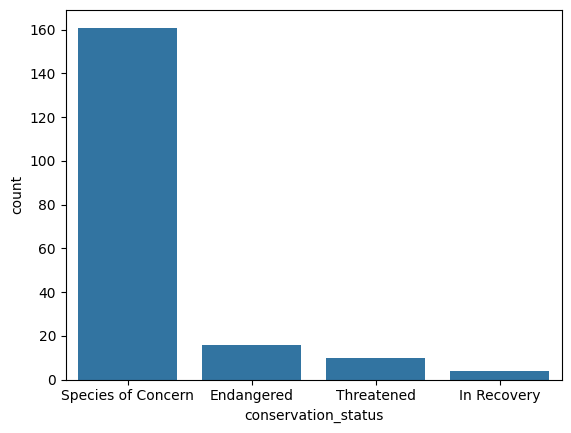

<Figure size 640x480 with 0 Axes>

In [11]:
sns.countplot(data=species, x="conservation_status")
plt.show()
plt.clf()

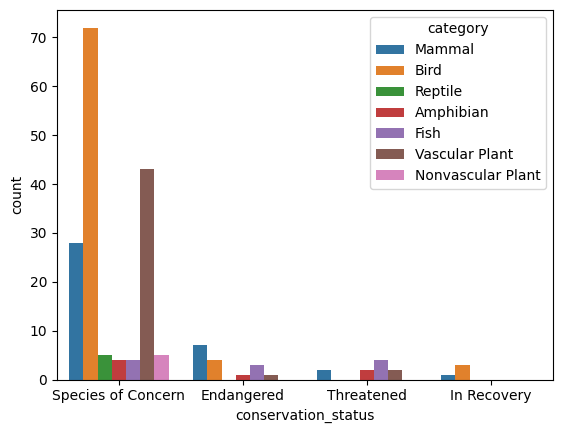

<Figure size 640x480 with 0 Axes>

In [12]:
sns.countplot(data=species, x="conservation_status", hue="category")
plt.show()
plt.clf()

category
Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: count, dtype: int64


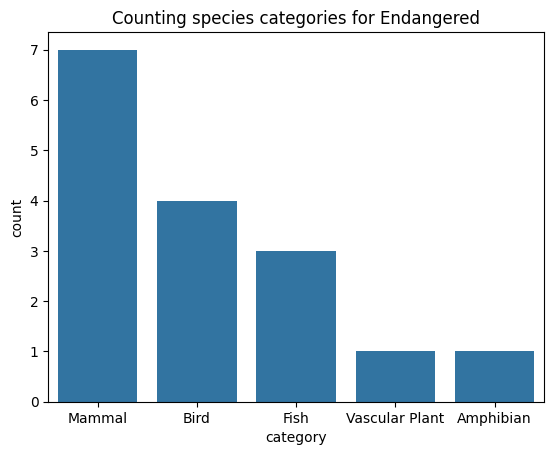

<Figure size 640x480 with 0 Axes>

In [13]:
species_endangered = species[species["conservation_status"] == "Endangered"]
print(species_endangered["category"].value_counts())
sns.countplot(x="category", data=species_endangered)
plt.title("Counting species categories for Endangered")
plt.show()
plt.clf()

In [14]:
print(species["category"].value_counts())
mammals=species[species["category"]=="Mammal"]
print("mammals: ")
print(mammals["category"].count())

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64
mammals: 
214


In [15]:
endangered_mammals = species_endangered[species_endangered["category"] == "Mammal"]
print("Amount of endangered mammals:")
print(endangered_mammals["category"].count())

Amount of endangered mammals:
7


Percentage of species categories endangered: 
category
Amphibian            1.250000
Bird                 0.767754
Fish                 2.362205
Mammal               3.271028
Nonvascular Plant         NaN
Reptile                   NaN
Vascular Plant       0.022371
Name: count, dtype: float64


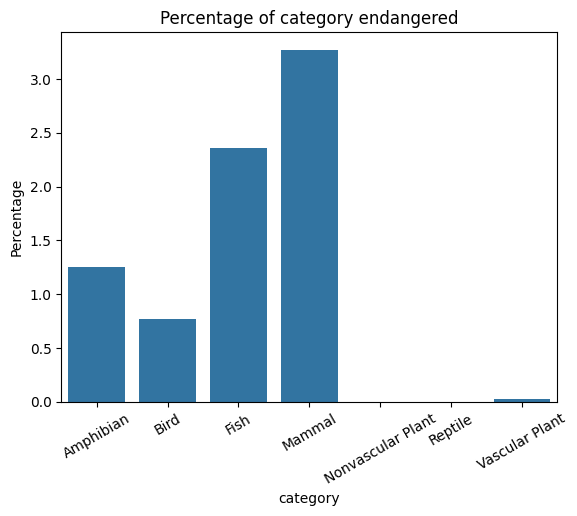

<Figure size 640x480 with 0 Axes>

In [16]:
print("Percentage of species categories endangered: ")
endangered_percentage=species_endangered["category"].value_counts()/species["category"].value_counts()*100
print(endangered_percentage)
sns.barplot(endangered_percentage)
plt.xticks(rotation = 30)
plt.title("Percentage of category endangered")
plt.ylabel("Percentage")
plt.show()
plt.clf()

In [17]:
print(observation["park_name"].unique())
print(observation["park_name"].unique()[0])

grouped = all_data.groupby(['park_name', 'category', 'scientific_name'], as_index=False)['observations'].sum()
grouped = grouped.sort_values(by=['park_name', 'category', 'observations'], ascending=[True, True, False])
most_common_species = grouped.drop_duplicates(subset=['park_name', 'category'])
print(most_common_species)

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Great Smoky Mountains National Park
                                 park_name           category  \
66                     Bryce National Park          Amphibian   
214                    Bryce National Park               Bird   
686                    Bryce National Park               Fish   
807                    Bryce National Park             Mammal   
917                    Bryce National Park  Nonvascular Plant   
1209                   Bryce National Park            Reptile   
3188                   Bryce National Park     Vascular Plant   
5607   Great Smoky Mountains National Park          Amphibian   
6048   Great Smoky Mountains National Park               Bird   
6227   Great Smoky Mountains National Park               Fish   
6347   Great Smoky Mountains National Park             Mammal   
6683   Great Smoky Mountains National Park  Nonvascular Plant   
675